In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

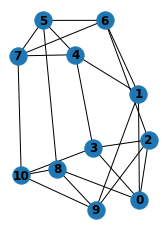

In [33]:
G = nx.random_regular_graph(4,11)

#G = nx.Graph()
#G.add_edges_from(edges)
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')



In [34]:
#Helper functions
def random_flooding(source, dest):
    neighbors = list(G.neighbors(source))
    index = random.randint(0,len(neighbors)-1)
    source = neighbors[index]
    temp = True
    loops = 0
    while (temp):
        if (source in nhops):
            if (index == len(neighbors)-1):
                index = -1
                loops+=1
                if (loops>10):
                    break
            else:
                index = index+1
                loops+=1
                if (loops > 10):
                    break
            source = neighbors[index]
        else:
            temp = False
            break
    battery_profile[source] -= 0.5
    nhops.append(source)
    if source == dest or loops > 10:
        return nhops
    random_flooding(source,dest)

In [35]:
#Populate battery dictionary with all 100%
#Each transmission will take 0.5% of battery
battery_profile = []
for i in range(11):
    battery_profile.append(100)

In [36]:
#Simulate Random routing 100 times  -> source=0 dest=10
count = 0
number_of_transmissions = []
while count != 100:
    start = 0
    dest = 10
    nhops = []
    battery_profile[start] -= 0.5
    nhops.append(start)
    count+=1
    random_flooding(start,dest)
    number_of_transmissions.append(len(nhops))

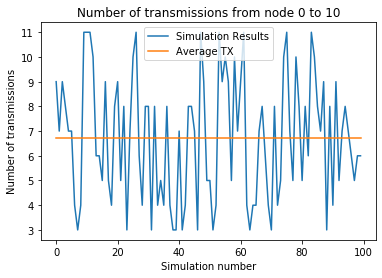

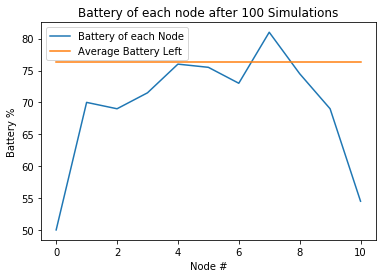

In [37]:
#Plot the number of transmissions in 100 packet simulations
x = []
x_battery = []
sum_tx = 0
sum_battery = 0
for i in range(100):
    x.append(i)
    sum_tx += number_of_transmissions[i]
    if (i<11):
        x_battery.append(i)
        sum_battery += battery_profile[i]
        
    
plt.title("Number of transmissions from node 0 to 10")
plt.xlabel("Simulation number")
plt.ylabel("Number of transmissions")
plt.figure(1)
plt.plot(x, number_of_transmissions, label='Simulation Results')
plt.figure(1)
plt.plot(x, np.ones(100)*(sum_tx/100), label='Average TX')
plt.legend()


plt.figure(0)
plt.title("Battery of each node after 100 Simulations")
plt.xlabel("Node #")
plt.ylabel("Battery %")
plt.plot(x_battery, battery_profile, label='Battery of each Node')
plt.figure(0)
plt.plot(x_battery, np.ones(11)*(sum_battery/10), label='Average Battery Left')
plt.legend()


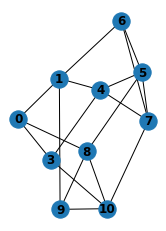

In [38]:
#Simulate node 2 dying
G.remove_node(2)
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')


In [39]:
battery_profile = []
for i in range(11):
    battery_profile.append(100)

In [40]:
#Simulate Random routing  -> source=1 dest=7
count = 0
number_of_transmissions = []
while count != 100:
    start = 0
    dest = 10
    nhops = []
    battery_profile[start] -= 0.5
    nhops.append(start)
    count+=1
    random_flooding(start,dest)
    number_of_transmissions.append(len(nhops))


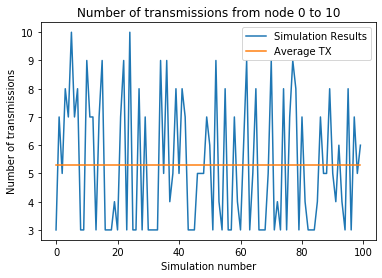

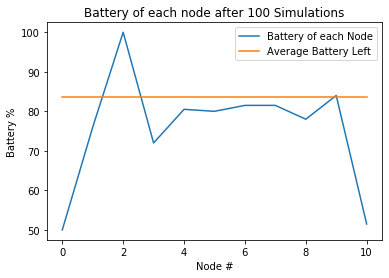

In [41]:
#Plot the number of transmissions in 100 packet simulations
x = []
x_battery = []
sum_tx = 0
sum_battery = 0
for i in range(100):
    x.append(i)
    sum_tx += number_of_transmissions[i]
    if (i<11):
        x_battery.append(i)
        sum_battery += battery_profile[i]
        
    
plt.title("Number of transmissions from node 0 to 10")
plt.xlabel("Simulation number")
plt.ylabel("Number of transmissions")
plt.figure(1)
plt.plot(x, number_of_transmissions, label='Simulation Results')
plt.figure(1)
plt.plot(x, np.ones(100)*(sum_tx/100), label='Average TX')
plt.legend()


plt.figure(0)
plt.title("Battery of each node after 100 Simulations")
plt.xlabel("Node #")
plt.ylabel("Battery %")
plt.plot(x_battery, battery_profile, label='Battery of each Node')
plt.figure(0)
plt.plot(x_battery, np.ones(11)*(sum_battery/10), label='Average Battery Left')
plt.legend()
